In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# Read the CSV file
df = pd.read_csv('top-500-movies.csv')

# View the first few rows of the DataFrame
df

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2013-02-06,A Good Day to Die Hard,/movie/Die-Hard-5#tab=summary,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0
497,498,1995-12-22,Cutthroat Island,/movie/Cutthroat-Island#tab=summary,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,NaN,1995.0
498,499,2013-12-19,The Secret Life of Walter Mitty,/movie/Secret-Life-of-Walter-Mitty-The-(2012)#...,91000000,58236838,187861183,12765508.0,PG,Adventure,2922.0,114.0,2013.0


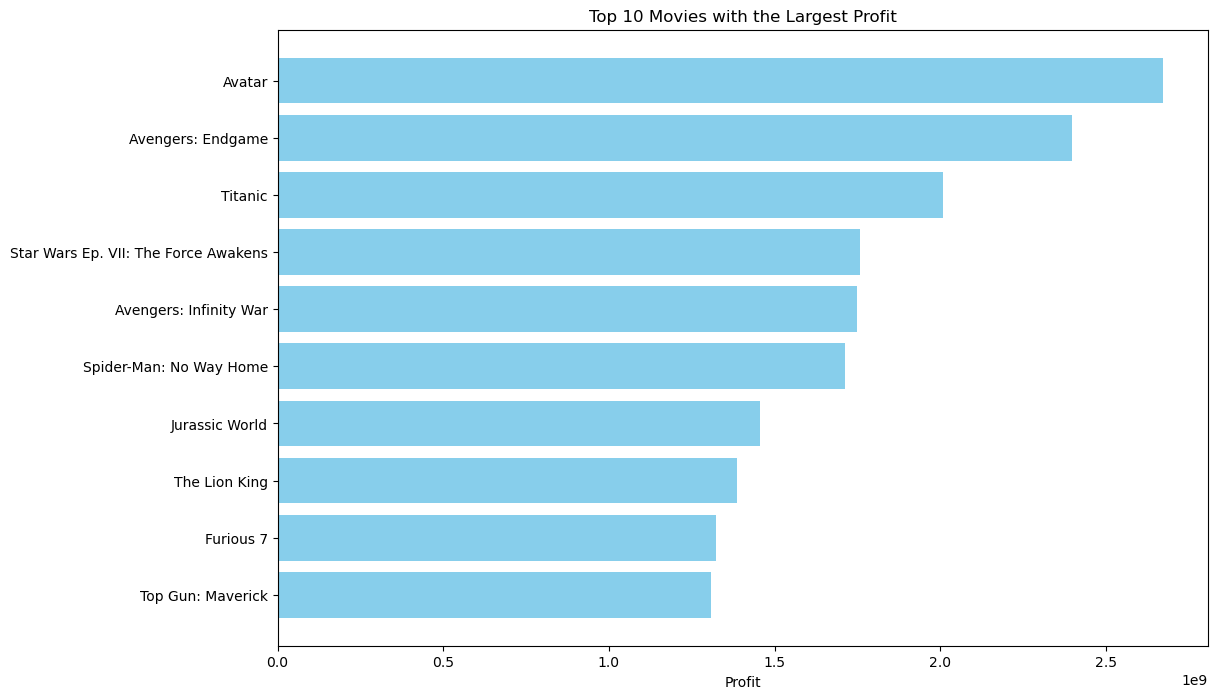

In [3]:
# Calculate the profit for each movie
df['profit'] = df['worldwide_gross'] - df['production_cost']

# Sort the movies by profit in descending order
df_sorted = df.sort_values(by='profit', ascending=False)

# Select the top 10 movies with the largest profit
top_10_movies = df_sorted.head(10)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_10_movies['title'], top_10_movies['profit'], color='skyblue')
plt.xlabel('Profit')
plt.title('Top 10 Movies with the Largest Profit')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit on top
plt.show()

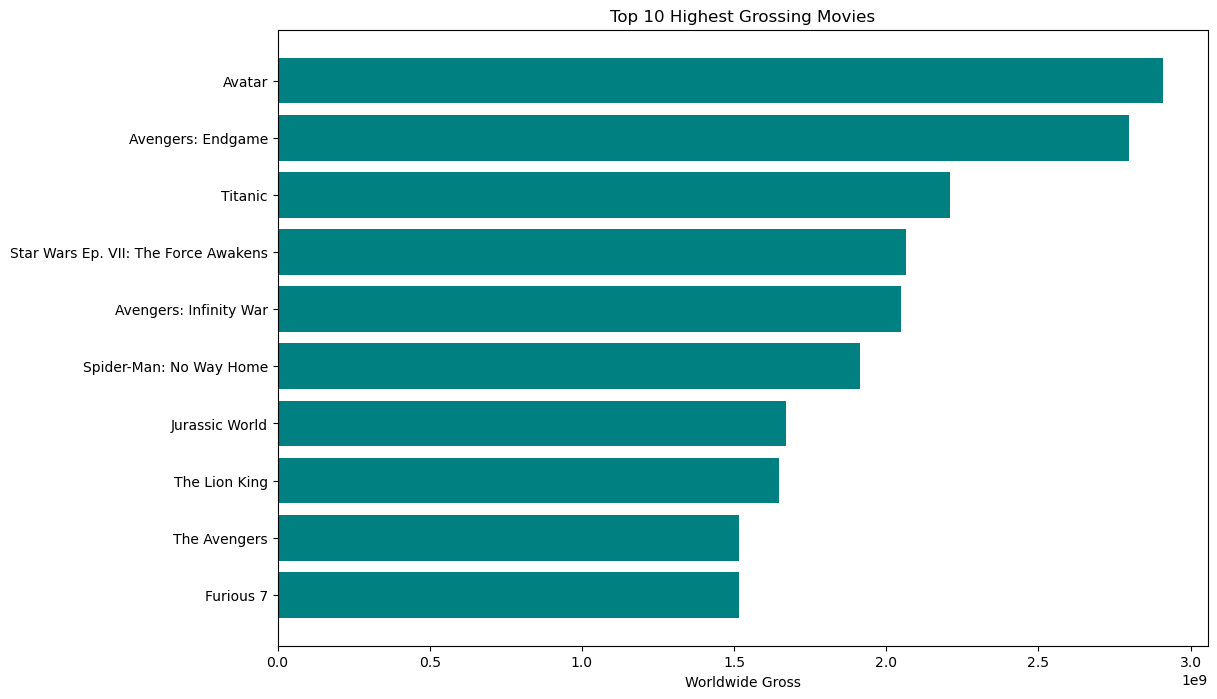

In [4]:
# Sort the movies by worldwide gross in descending order
df_sorted = df.sort_values(by='worldwide_gross', ascending=False)

# Select the top 10 movies with the highest worldwide gross
top_10_grossing = df_sorted.head(10)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_10_grossing['title'], top_10_grossing['worldwide_gross'], color='teal')
plt.xlabel('Worldwide Gross')
plt.title('Top 10 Highest Grossing Movies')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest gross on top
plt.show()

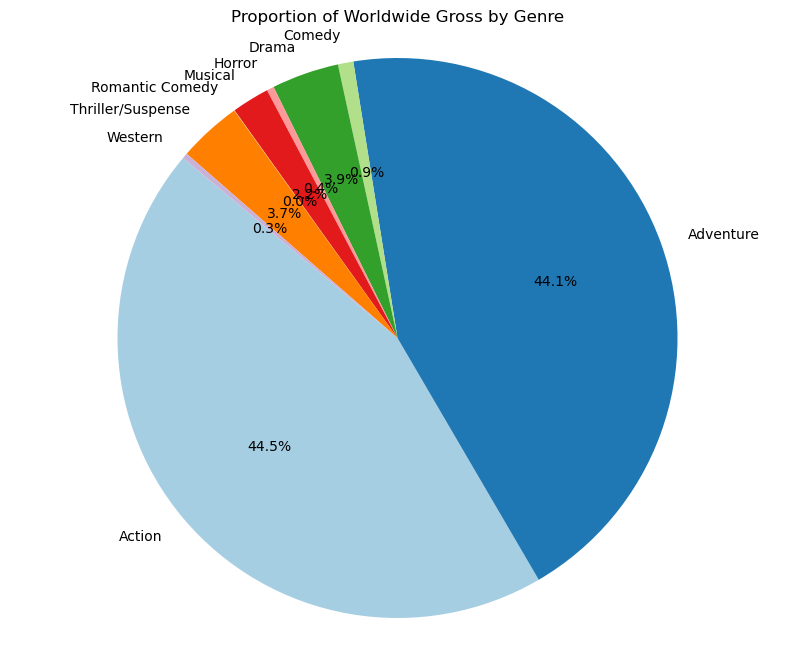

In [16]:
# Filter out 'Black Comedy' genre
df_filtered = df[df['genre'] != 'Black Comedy']

# Aggregate worldwide gross by genre
genre_gross = df_filtered.groupby('genre')['worldwide_gross'].sum()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_gross, labels=genre_gross.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(genre_gross))), startangle=140)
plt.title('Proportion of Worldwide Gross by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

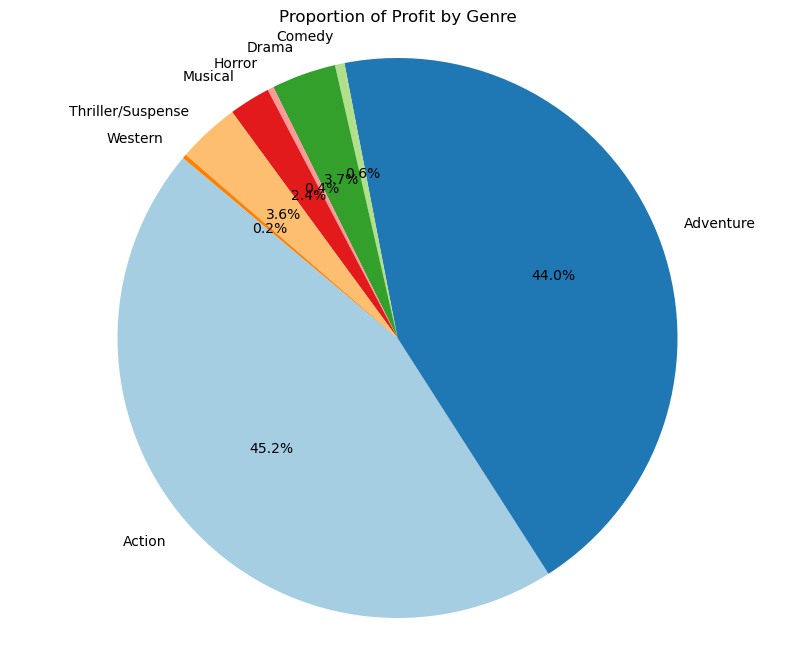

In [25]:
# Calculate the profit for each movie
df['profit'] = df['worldwide_gross'] - df['production_cost']

# Filter out 'Black Comedy' genre
df_filtered = df[df['genre'] != 'Black Comedy']

# Filter out rows where profit is negative or NaN
df_filtered = df_filtered[df_filtered['profit'] >= 0]

# Aggregate profit by genre
genre_profit = df_filtered.groupby('genre')['profit'].sum()

# Check if there are any NaN values in genre_profit
if genre_profit.isnull().any():
    genre_profit = genre_profit.dropna()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_profit, labels=genre_profit.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(genre_profit))), startangle=140)
plt.title('Proportion of Profit by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

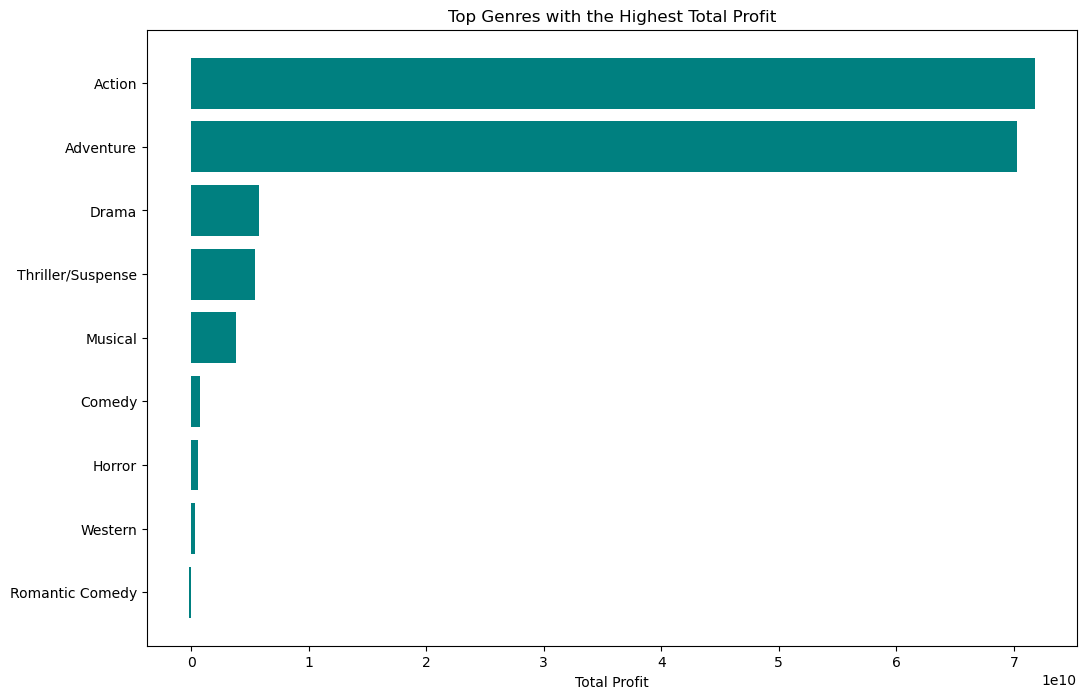

In [19]:
# Calculate the profit for each movie
df['profit'] = df['worldwide_gross'] - df['production_cost']

# Exclude 'Black Comedy' genre
df_filtered = df[df['genre'] != 'Black Comedy']

# Aggregate profit by genre
genre_profit = df_filtered.groupby('genre')['profit'].sum()

# Sort genres by total profit in descending order
genre_profit_sorted = genre_profit.sort_values(ascending=False)

# Select the top genres (e.g., top 10)
top_genres = genre_profit_sorted.head(10)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_genres.index, top_genres, color='teal')
plt.xlabel('Total Profit')
plt.title('Top Genres with the Highest Total Profit')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit on top
plt.show()

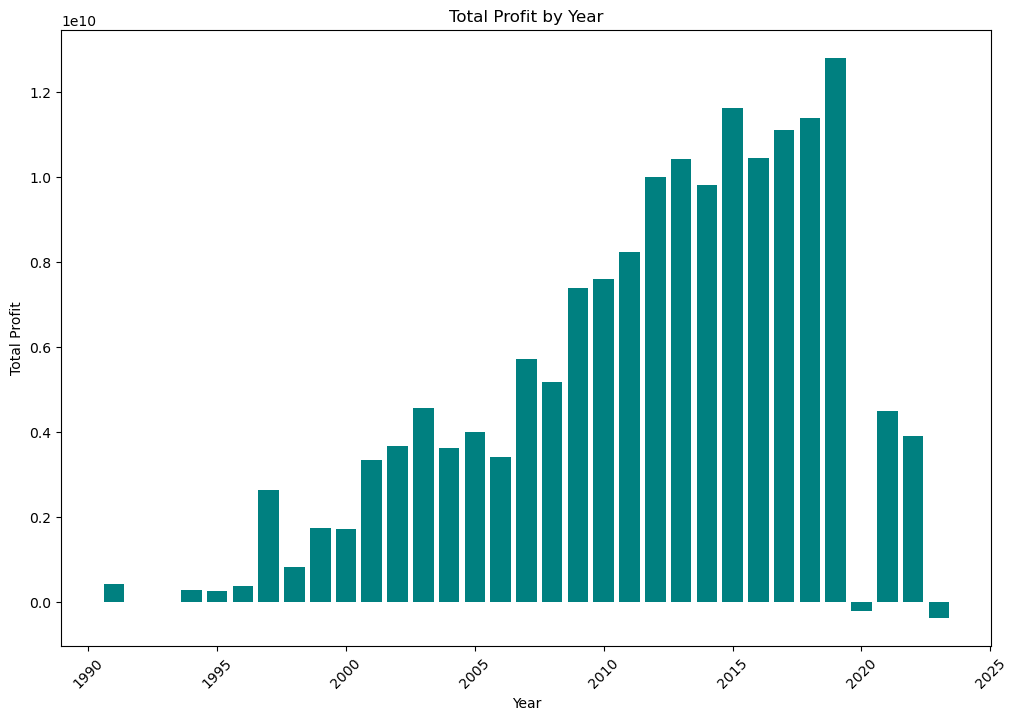

In [11]:
# Calculate the profit for each movie
df['profit'] = df['worldwide_gross'] - df['production_cost']

# Aggregate profit by year
year_profit = df.groupby('year')['profit'].sum()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(year_profit.index, year_profit, color='teal')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

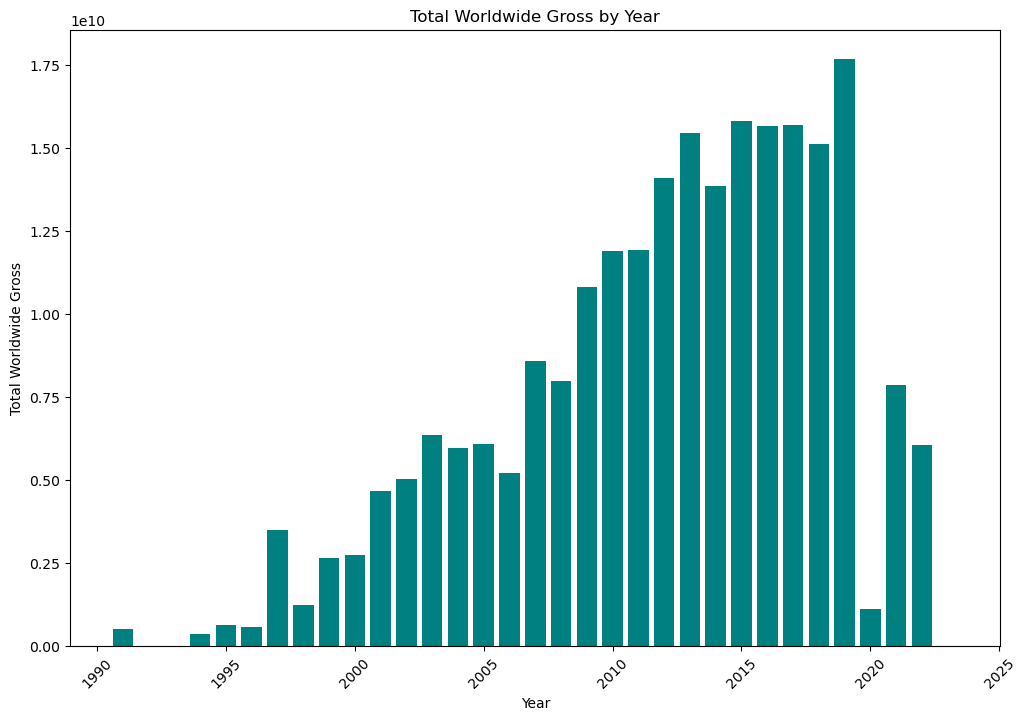

In [12]:
# Aggregate worldwide gross by year
year_gross = df.groupby('year')['worldwide_gross'].sum()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(year_gross.index, year_gross, color='teal')
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross')
plt.title('Total Worldwide Gross by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

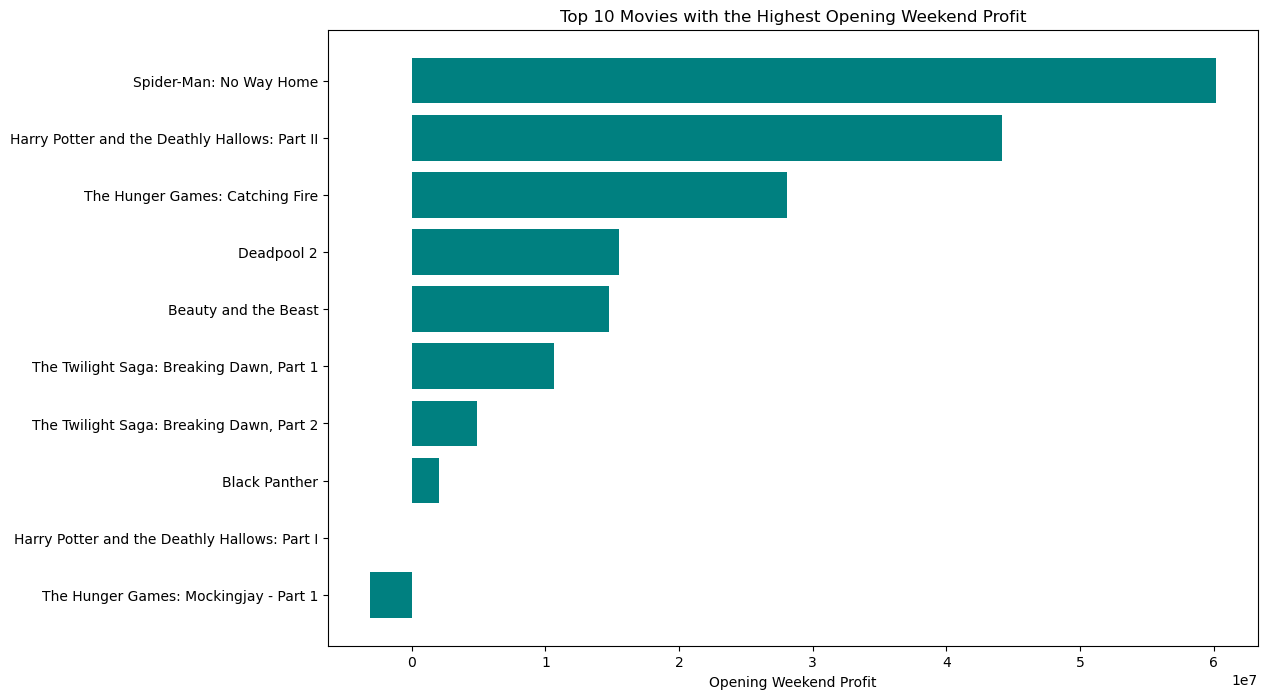

In [13]:
# Calculate the profit for each movie's opening weekend
df['opening_weekend_profit'] = df['opening_weekend'] - df['production_cost']

# Sort movies by opening weekend profit in descending order
df_sorted = df.sort_values(by='opening_weekend_profit', ascending=False)

# Select the top 10 movies with the highest opening weekend profit
top_opening_weekend_movies = df_sorted.head(10)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_opening_weekend_movies['title'], top_opening_weekend_movies['opening_weekend_profit'], color='teal')
plt.xlabel('Opening Weekend Profit')
plt.title('Top 10 Movies with the Highest Opening Weekend Profit')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit on top
plt.show()

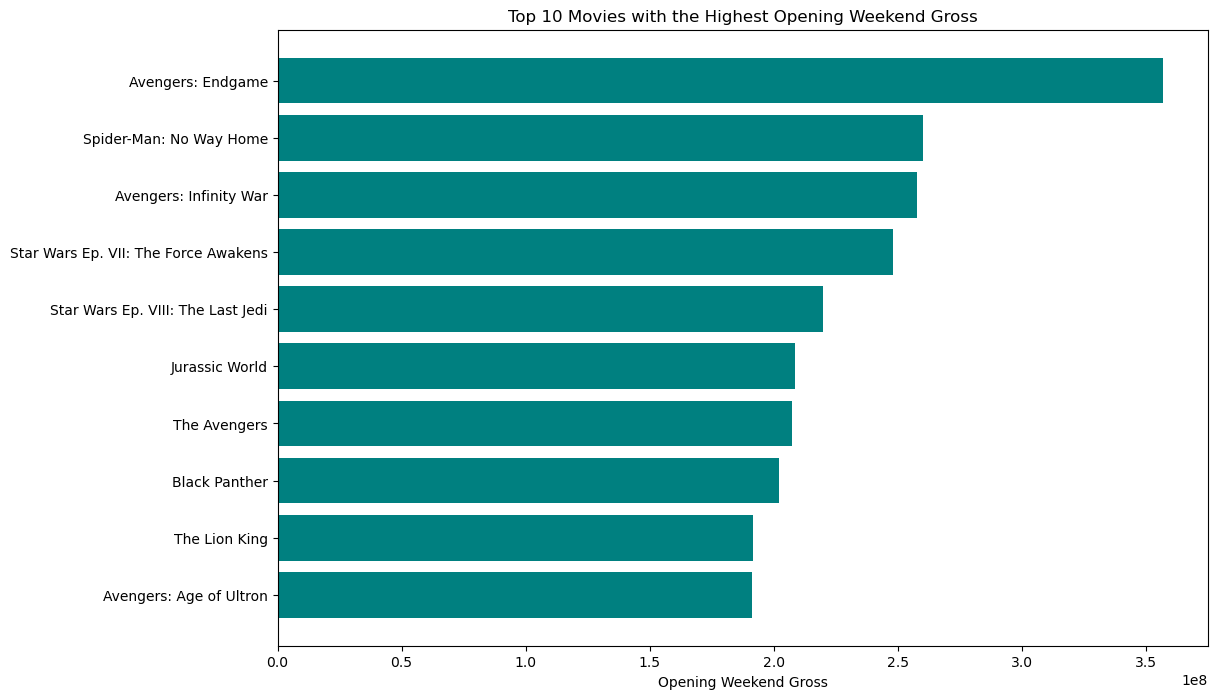

In [14]:
# Sort movies by opening weekend gross in descending order
df_sorted = df.sort_values(by='opening_weekend', ascending=False)

# Select the top 10 movies with the highest opening weekend gross
top_opening_weekend_movies = df_sorted.head(10)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_opening_weekend_movies['title'], top_opening_weekend_movies['opening_weekend'], color='teal')
plt.xlabel('Opening Weekend Gross')
plt.title('Top 10 Movies with the Highest Opening Weekend Gross')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest gross on top
plt.show()